---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [4]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [5]:
data = pd.read_csv('C:\Leo\Byte Degree\Final Project\바이트디그리 데이터사이언스 최종프로젝트 데이터셋/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [6]:
print(data.columns)
print(data.shape)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48895, 16)


### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [8]:
data = data[pd.notnull(data['name'])]
data= data[pd.notnull(data['host_name'])]
data.shape

(48858, 16)

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [9]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np


# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

## 피드백

- 현재와 같이 하셔도 무방하고, 아래와 같이 간단한 방법도 있으니 참고해주세요.

``` visual_data['price'].describe(percentiles=[.05, 0.25, 0.50, 0.75, 0.95]) ```

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
print(data['price'].describe())
print('-' *20)
print(data['price'].quantile(q=0.05))
print('-' *20)
print(data['price'].quantile(q=0.95))

count   48858.00
mean      152.74
std       240.23
min         0.00
25%        69.00
50%       106.00
75%       175.00
max     10000.00
Name: price, dtype: float64
--------------------
40.0
--------------------
355.0


### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

In [12]:
price = data['price']
drop = data[price > price.quantile(0.95)]
drop

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.75,-74.00,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.70,-73.99,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73,-74.00,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66,-73.98,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
158,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,Brooklyn,Boerum Hill,40.69,-73.98,Entire home/apt,475,3,23,2018-12-31,0.27,1,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48748,36417250,US Open special 2-bed luxury condo,133288905,Cherie,Manhattan,Midtown,40.75,-73.97,Entire home/apt,369,4,0,NaN,nan,3,4
48755,36419291,Wyndham Midtown 45 New York City 1 Bedroom Deluxe,273812306,Kelly,Manhattan,Midtown,40.75,-73.97,Private room,380,3,0,NaN,nan,1,3
48757,36419574,Luxury & Spacious 1500 ft² MANHATTAN Townhouse,11454384,Ellen,Manhattan,Tribeca,40.72,-74.01,Entire home/apt,700,3,0,NaN,nan,1,37
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.71,-74.01,Entire home/apt,475,2,0,NaN,nan,1,64


In [13]:
drop.min()

id                                                          15396
name                               3 bedroom loft in Williamsburg
host_id                                                      8730
host_name                                                    0123
neighbourhood_group                                         Bronx
neighbourhood                                            Allerton
latitude                                                    40.53
longitude                                                  -74.20
room_type                                         Entire home/apt
price                                                         356
minimum_nights                                                  1
number_of_reviews                                               0
reviews_per_month                                            0.01
calculated_host_listings_count                                  1
availability_365                                                0
dtype: obj

In [14]:
drop  = data[data['price'] >= 356].index
new_data = data.drop(drop)
new_data


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,nan,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,nan,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,nan,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,nan,6,2


## 피드백

- 수치 결과는 정확하게 도출하셨고,
- 아래 문제에서 사전에 안내된 시각화 옵션이 누락된것 같습니다.
- 적용해보시고 차이를 비교해보시면 좋을것 같습니다.

``` cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8) ```

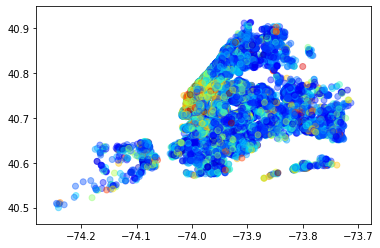

In [15]:
plt.scatter(x=new_data['longitude'], y = new_data['latitude'], c = new_data['price'],cmap=plt.get_cmap('jet'),alpha=0.4)





### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

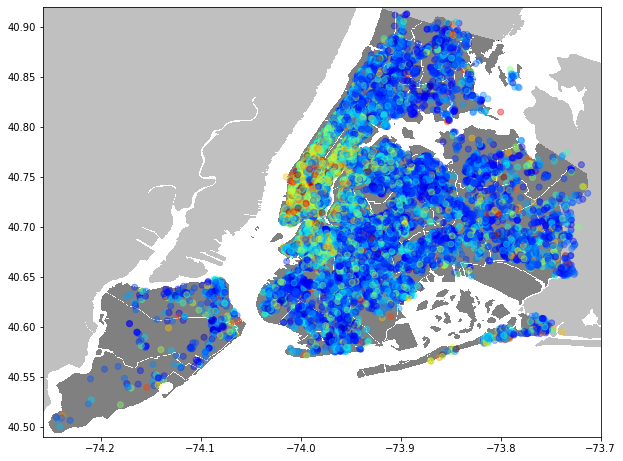

In [16]:
newyorkcity = plt.imread('C:\Leo\Byte Degree\Final Project\바이트디그리 데이터사이언스 최종프로젝트 데이터셋/newyorkcity.png')
plt.figure(figsize=(10,8))
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
plt.scatter(x=new_data['longitude'], y = new_data['latitude'], c = new_data['price'],cmap=plt.get_cmap('jet'), alpha=0.4)

ax = plt.gca()

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [17]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re


# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
new_data.to_sql(name='data', con=conn)
# 4번 예제
# pd.read_sql('select * from data', conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [18]:
pat = "^(a-zA-Z0-9\s[.][,][#][-])*"
result = new_data['name'].str.contains(pat)
result

C:\Users\ipark\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0        True
1        True
2        True
3        True
4        True
         ... 
48890    True
48891    True
48892    True
48893    True
48894    True
Name: name, Length: 46418, dtype: bool

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [19]:
new_data['room_type'].value_counts()

Entire home/apt    23250
Private room       22027
Shared room         1141
Name: room_type, dtype: int64

In [20]:
new_data.groupby('room_type').sum()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,424083968998,1381263039027,946926.97,-1719552.99,3867080,198016,549986,24678.73,234940,2481550
Private room,428150025474,1586758233207,897138.56,-1628734.16,1754401,117008,536656,25381.03,70220,2426401
Shared room,26267541031,117404130368,46472.93,-84369.11,68733,7455,19219,1242.98,5385,185638


## 피드백

- pirce == 355 라는 조건이 다소 의아한데, 
- 지금처럼 price 기준으로 정렬후에 상위 1개의 행만 가지고 오셔서, name, host_id, price컬럼만 표시해보시면 좋을것 같습니다.
- 코딩시 보통은 변동성/확장성을 고려하여 조건값을 355와 같이 상수로 지정하지는 않습니다. 변수를 활용하는 방향이 더 좋습니다.

In [21]:
#Searching highest price in Entire home/apt room type
entire = new_data[new_data['room_type']=='Entire home/apt'].sort_values(by='price', ascending = False)
entire[:1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14679,11595172,LUXURY 2 BR 2 BATH -WASHER/DRYER/DOORMAN-E 52n...,2856748,Ruchi,Manhattan,Midtown,40.76,-73.96,Entire home/apt,355,30,0,NaN,nan,49,364


In [22]:
entire[['name','host_id','price']][:1]['price']
max_price = 355 #highest price among entire home/apt category
entire[entire['price'] == max_price][['name','host_id','price']]



,name,host_id,price
14679,LUXURY 2 BR 2 BATH -WASHER/DRYER/DOORMAN-E 52n...,2856748,355
43560,Luxe Modern Tribeca Studio,254165437,355
36155,Luxury Oasis in SoHo,333712,355
9380,"Big home, 3 floors, good 4 families",37633503,355
1494,Elegant 2 BDRM Brooklyn Brownstone,3411621,355
21553,LIVING THE NYC EXPERIENCE,7889472,355


In [23]:
#Searching highest price in Private room type
private = new_data[new_data['room_type']=='Private room'].sort_values(by='price', ascending=False)
private[:1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
37228,29584099,NYC Best 2 Bedroom Apartment Location,222700281,Paul,Manhattan,Kips Bay,40.74,-73.98,Private room,355,2,5,2019-03-07,0.66,1,230


In [24]:
private[['name','host_id','price']][:1]['price']
max_price = 355 #highest price among Private category
private[private['price'] == max_price][['name','host_id','price']]

,name,host_id,price
37228,NYC Best 2 Bedroom Apartment Location,222700281,355
35996,Bedroom Apartment in the Heart of Manhattan,215897007,355
41100,"New York City, Midtown 2 Bedrooms, Sleeps 6",239644931,355
38397,Lower East Side Private Bedroom,72614493,355


In [25]:
#Searching highest price in Private room type
shared = new_data[new_data['room_type']=='Shared room'].sort_values(by='price', ascending=False)
shared[:1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24626,19791460,2nd Street Sanctuary,21016975,Stephen,Manhattan,East Village,40.72,-73.98,Shared room,350,1,5,2019-01-11,0.26,1,0


In [26]:
shared[['name','host_id','price']][:1]['price']
max_price = 350 #highest price among Shared category
shared[shared['price'] == max_price][['name','host_id','price']]

,name,host_id,price
24626,2nd Street Sanctuary,21016975,350
22944,"Spacious Private 1BR apt,common area in UES/Ha...",21372426,350
1711,Unique West Village Loft with Deck,266210,350


### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

## 피드백

- 아래 처럼 그룹별로 데이터프레임을 만드신 이후에, hist 역시 각자 1번씩 별도로 시행해보시면 좋을것 같습니다.
- 예를 들면,

``` entire.hist(bins=bins=range(0,501,10)) ```

- 위 코드를 총 3회 수행해서 시각화를 해보시면 좋을거 같습니다.

In [27]:
entire = new_data[new_data['room_type'] == 'Entire home/apt']['price']
shared = new_data[new_data['room_type'] == 'Shared room']['price']
private = new_data[new_data['room_type'] == 'Private room']['price']

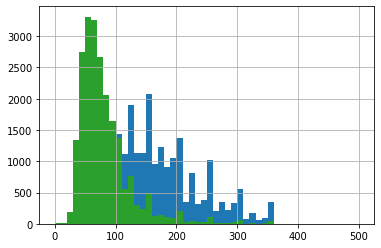

In [28]:
entire.hist(bins=range(0,501,10))
shared.hist(bins=range(0,501,10))
private.hist(bins=range(0,501,10))
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [25]:
top_10 = new_data.groupby('host_id').count().sort_values(by='name',ascending=False)[:10]
top_10

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,,
219517861,272,272,272,272,272,272,272,272,272,272,272,164,164,272,272
107434423,195,195,195,195,195,195,195,195,195,195,195,27,27,195,195
137358866,103,103,103,103,103,103,103,103,103,103,103,51,51,103,103
30283594,98,98,98,98,98,98,98,98,98,98,98,35,35,98,98
12243051,95,95,95,95,95,95,95,95,95,95,95,29,29,95,95
61391963,91,91,91,91,91,91,91,91,91,91,91,79,79,91,91
16098958,91,91,91,91,91,91,91,91,91,91,91,58,58,91,91
22541573,87,87,87,87,87,87,87,87,87,87,87,39,39,87,87
1475015,52,52,52,52,52,52,52,52,52,52,52,42,42,52,52


In [26]:
result = pd.read_sql('select count(name) as cnt,avg(price) from data GROUP BY host_id ORDER BY cnt DESC limit 10', conn)
result.set_index(top_10.index)

,cnt,avg(price)
host_id,,
219517861,272,206.49
107434423,195,285.56
137358866,103,43.83
30283594,98,223.67
12243051,95,211.31
61391963,91,146.24
16098958,91,196.81
22541573,87,215.44
1475015,52,149.19


## 종합 프로젝트

- 퀴즈 9, 10의 경우는 수정이 필요해보입니다. (현재 점수는 70점입니다)
- 첨부된 가이드 참고하시어 수정후 재출해주시면 다시 리뷰진행하겠습니다.
- 지도 시각화 부분(퀴즈6,7)의 경우는 사소한 옵션이 누락된 상태인데, 이역시 수정해보시면 좋을 것 같습니다.
- 구글프로젝트와 비슷한 피드백을 참고해주시면 좋을거 같습니다.
    - 결과를 보다 깔끔하고 보기 좋게 정리하는 연습이 필요해보입니다.
    - 코드의 전달성과 확장성, 효율성 등을 고려해서 짜는 연습을 해보시면 좋을거 같습니다.
    
- 수고 많으셨습니다.